In [88]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [89]:
df = pd.read_csv(r"dataset\company_01_merge_sales.csv", parse_dates=["date"], index_col="date")
df = df.sort_index()
df.dropna(inplace=True)

In [90]:
df.index

DatetimeIndex(['2074-04-01', '2074-05-01', '2074-06-01', '2074-07-01',
               '2074-08-01', '2074-09-01', '2074-10-01', '2074-11-01',
               '2074-12-01', '2075-01-01', '2075-02-01', '2075-03-01',
               '2075-04-01', '2075-05-01', '2075-06-01', '2075-07-01',
               '2075-08-01', '2075-09-01', '2075-10-01', '2075-11-01',
               '2075-12-01', '2076-01-01', '2076-02-01', '2076-03-01',
               '2076-04-01', '2076-05-01', '2076-06-01', '2076-07-01',
               '2076-08-01', '2076-09-01', '2076-10-01', '2076-11-01',
               '2076-12-01', '2077-01-01', '2077-02-01', '2077-03-01',
               '2077-04-01', '2077-05-01', '2077-06-01', '2077-07-01',
               '2077-08-01', '2077-09-01', '2077-10-01', '2077-11-01',
               '2077-12-01', '2078-01-01', '2078-02-01', '2078-03-01',
               '2078-04-01', '2078-05-01', '2078-06-01', '2078-07-01',
               '2078-08-01', '2078-09-01', '2078-10-01', '2078-11-01',
      

In [91]:
df.columns

Index(['sales'], dtype='object')

In [92]:
# data visualization using plotly
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

df_sales = pd.read_csv(r"dataset\company_01_merge_sales.csv")

df_sales.columns = ['date','sales']

df_sales[['Year', 'Month']] = df_sales['date'].str.split('-', expand=True)
df_sales['Year'] = df_sales['Year'].astype(int)
df_sales['Month'] = df_sales['Month'].astype(int)
nepali_months_fiscal_order = {
    4: "Shrawan", 5: "Bhadra", 6: "Asoj", 7: "Kartik",
    8: "Mangsir", 9: "Poush", 10: "Magh", 11: "Falgun",
    12: "Chaitra", 1: "Baishakh", 2: "Jestha", 3: "Ashadh"
}

df_sales['Month_Name'] = df_sales['Month'].map(nepali_months_fiscal_order)


df_sales['Fiscal_Year'] = df_sales.apply(lambda row: 
                                         f"{row['Year']}-{row['Year']+1}" if row['Month'] >= 4 
                                         else f"{row['Year']-1}-{row['Year']}", axis=1)

df_sales['Month_Order'] = df_sales['Month'].apply(lambda x: list(nepali_months_fiscal_order.keys()).index(x))

df_sales = df_sales.sort_values(by=['Fiscal_Year', 'Month_Order'])

fig = go.Figure()

fiscal_years = df_sales['Fiscal_Year'].unique()

for fy in fiscal_years:
    df_fy = df_sales[df_sales['Fiscal_Year'] == fy]
    fig.add_trace(go.Scatter(
        x=df_fy['Month_Name'], 
        y=df_fy['sales'], 
        mode='lines+markers',
        name=f'Fiscal Year {fy}',
        line=dict(shape='spline')  
    ))

fig.update_layout(
    title="Sales Trend by Fiscal Year",
    xaxis_title="Nepali Month",
    yaxis_title="Sales",
    xaxis=dict(categoryorder='array', categoryarray=list(nepali_months_fiscal_order.values())),
    template="plotly_dark",
    hovermode="x unified"
)

pyo.iplot(fig)


ACF values are : 
0 1.0
1 0.22996185227648164
2 -0.18535357045116369
3 -0.20711475659127307
4 -0.06727283381411672
5 0.09609678580662509
6 -0.017178520642806498
7 0.07413665937775935
8 -0.09326873903936754
9 -0.1969586338497931
10 -0.11609062120441647
11 0.23496921817731095
12 0.4709848292478105
13 0.16746968358530742
14 -0.2070059835904134
15 -0.17843655439267564
16 0.015174720385785406
17 -0.02692707040536807
18 -0.07292291798621282
19 -0.014198567636898281
20 -0.1361075109817034
21 -0.20038839376498094
22 -0.08354769361324571
23 0.1663600329822287
24 0.3686482442147088
25 0.003975961894299688
26 -0.1814851581079975
PACF values are : 
0 1.0
1 0.2324889055982012
2 -0.257438459573197
3 -0.1119199975547622
4 -0.034933124318619356
5 0.06743719610434354
6 -0.12121744871173211
7 0.15427001055851053
8 -0.1961327346681728
9 -0.13453977167788272
10 -0.09284934866321368
11 0.3137174437285421
12 0.3541576765100677
13 0.14141188822477813
14 -0.1832019237773542
15 0.037199648343587625
16 0.023813

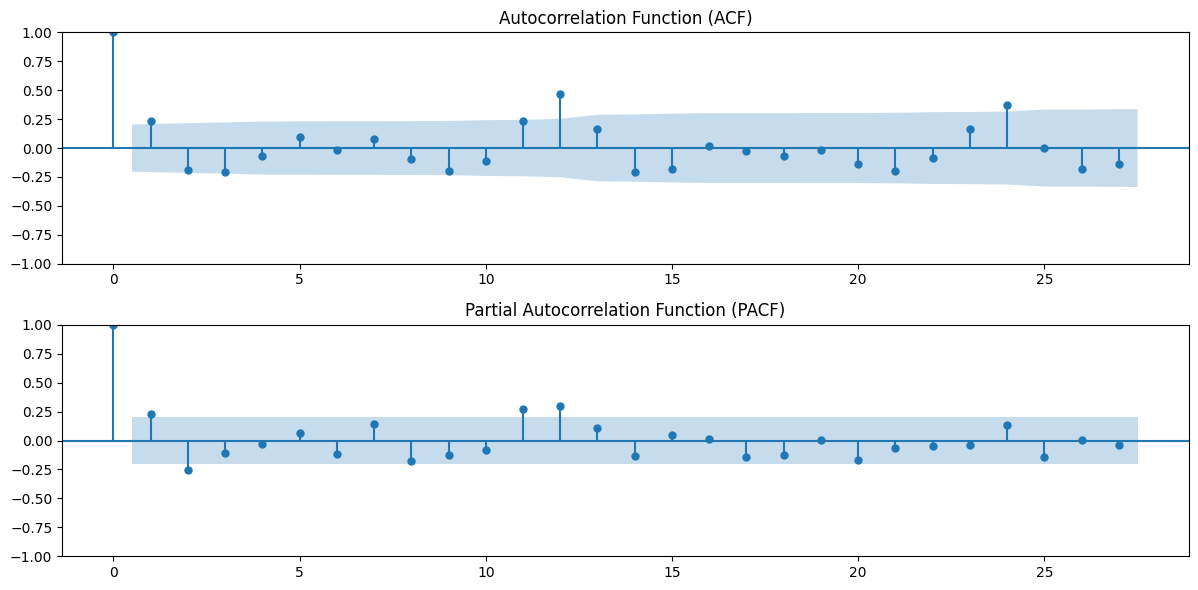

In [93]:
# analyzing auto_correlation and partial auto correlation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Calculate the ACF and PACF

acf_values = acf(df["sales"], nlags=27, fft=False)
pacf_values = pacf(df["sales"], nlags=27)

# # Print ACF and PACF values
print("ACF values are : ")
for i in range (0,27):
    print(i,acf_values[i])
    
print("PACF values are : ")
for i in range (0,27):
    print(i,pacf_values[i])

print("The PACF values are : ")
for i in range (0, 27):
    print(i, pacf_values[i])
    pass

# Plot the ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(df["sales"], lags=27, ax=plt.gca())  
plt.title("Autocorrelation Function (ACF)")

plt.subplot(2, 1, 2)
plot_pacf(df["sales"], lags=27, ax=plt.gca())  
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()




In [94]:
print("ACF values are : ")
print(acf_values)

ACF values are : 
[ 1.          0.22996185 -0.18535357 -0.20711476 -0.06727283  0.09609679
 -0.01717852  0.07413666 -0.09326874 -0.19695863 -0.11609062  0.23496922
  0.47098483  0.16746968 -0.20700598 -0.17843655  0.01517472 -0.02692707
 -0.07292292 -0.01419857 -0.13610751 -0.20038839 -0.08354769  0.16636003
  0.36864824  0.00397596 -0.18148516 -0.13722905]


In [95]:
print("PACF values are : ")
print(pacf_values)

PACF values are : 
[ 1.          0.23248891 -0.25743846 -0.11192    -0.03493312  0.0674372
 -0.12121745  0.15427001 -0.19613273 -0.13453977 -0.09284935  0.31371744
  0.35415768  0.14141189 -0.18320192  0.03719965  0.02381313 -0.18189822
 -0.18503207  0.00284088 -0.22840416 -0.11477705 -0.08178039 -0.03370285
  0.2397648  -0.19307067 -0.01208216 -0.04208467]


In [96]:
df["year"] = df.index.year
df["month"] = df.index.month
df["quarter"] = df.index.quarter

In [97]:
df["year"] = df.index.year
df["month"] = df.index.month
df["quarter"] = df.index.quarter
df["lag_1"] = df["sales"].shift(1)
df["lag_2"] = df["sales"].shift(2)
df["lag_11"] = df["sales"].shift(11)
df["lag_12"] = df["sales"].shift(12)
df["lag_24"] = df["sales"].shift(24)

df["rolling_mean_3"] = df["sales"].rolling(window=3).mean()
df["rolling_mean_6"] = df["sales"].rolling(window=6).mean() 


df.dropna(inplace=True)

In [ ]:
# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
X_train, y_train = train.drop(columns=["sales"]), train["sales"]
X_test, y_test = test.drop(columns=["sales"]), test["sales"]

In [99]:
# Standardization
scaler_X = StandardScaler()
scaler_y = StandardScaler()
# scaler_X = MinMaxScaler()
# scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [100]:
# from sklearn.model_selection import GridSearchCV

# # Hyperparameter Tuning
# param_grid = {
#     "n_estimators": [500, 1000, 1500],
#     "max_depth": [5, 10, 15],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4]

# }


In [101]:
# #Hyperparameter Tuning and cross-validation using Grid Search Technique
# rf = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=True)
# grid_search = GridSearchCV(rf, param_grid, cv=10, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train_scaled)

In [102]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=42, n_jobs=-1, verbose=1)
rf_model.fit(X_train_scaled, y_train_scaled)
yran_pred_scaled = rf_model.predict(X_test_scaled)
yran_pred = scaler_y.inverse_transform(yran_pred_scaled.reshape(-1, 1)).flatten()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [103]:
# rf=RandomForestRegressor(random_stae=42, n_jobs=-1, verbose=True)
# grid_search = GridSearchCV(rf, param_grid, cv=10, scoring="neg_mean_s")

In [104]:
# rf=RandomForestRegressor(random_state=42,n_jobs=-1,verbose=True)


In [105]:
# #
# best_rf = grid_search.best_estimator_
# y_pred_scaled = best_rf.predict(X_test_scaled)
# yran_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()

In [106]:
# Random Forest Metrics
mae_rf = mean_absolute_error(y_test, yran_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, yran_pred))
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Random Forest MAE: 86684694.75
Random Forest RMSE: 106753684.67


In [107]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, yran_pred)
print(f"Random Forest R² Score: {r2_rf:.4f}")


Random Forest R² Score: 0.4578


In [108]:
df.index

DatetimeIndex(['2076-04-01', '2076-05-01', '2076-06-01', '2076-07-01',
               '2076-08-01', '2076-09-01', '2076-10-01', '2076-11-01',
               '2076-12-01', '2077-01-01', '2077-02-01', '2077-03-01',
               '2077-04-01', '2077-05-01', '2077-06-01', '2077-07-01',
               '2077-08-01', '2077-09-01', '2077-10-01', '2077-11-01',
               '2077-12-01', '2078-01-01', '2078-02-01', '2078-03-01',
               '2078-04-01', '2078-05-01', '2078-06-01', '2078-07-01',
               '2078-08-01', '2078-09-01', '2078-10-01', '2078-11-01',
               '2078-12-01', '2079-01-01', '2079-02-01', '2079-03-01',
               '2079-04-01', '2079-05-01', '2079-06-01', '2079-07-01',
               '2079-08-01', '2079-09-01', '2079-10-01', '2079-11-01',
               '2079-12-01', '2080-01-01', '2080-02-01', '2080-03-01',
               '2080-04-01', '2080-05-01', '2080-06-01', '2080-07-01',
               '2080-08-01', '2080-09-01', '2080-10-01', '2080-11-01',
      

In [109]:
df['sales']

date
2076-04-01    2.044056e+07
2076-05-01    7.471673e+07
2076-06-01    3.178409e+08
2076-07-01    1.370703e+08
2076-08-01    3.171182e+08
                  ...     
2081-07-01    2.264473e+08
2081-08-01    2.393450e+08
2081-09-01    3.097765e+08
2081-10-01    3.827388e+08
2081-11-01    1.266479e+08
Name: sales, Length: 68, dtype: float64

In [110]:
test.index

DatetimeIndex(['2080-10-01', '2080-11-01', '2080-12-01', '2081-01-01',
               '2081-02-01', '2081-03-01', '2081-04-01', '2081-05-01',
               '2081-06-01', '2081-07-01', '2081-08-01', '2081-09-01',
               '2081-10-01', '2081-11-01'],
              dtype='datetime64[ns]', name='date', freq=None)

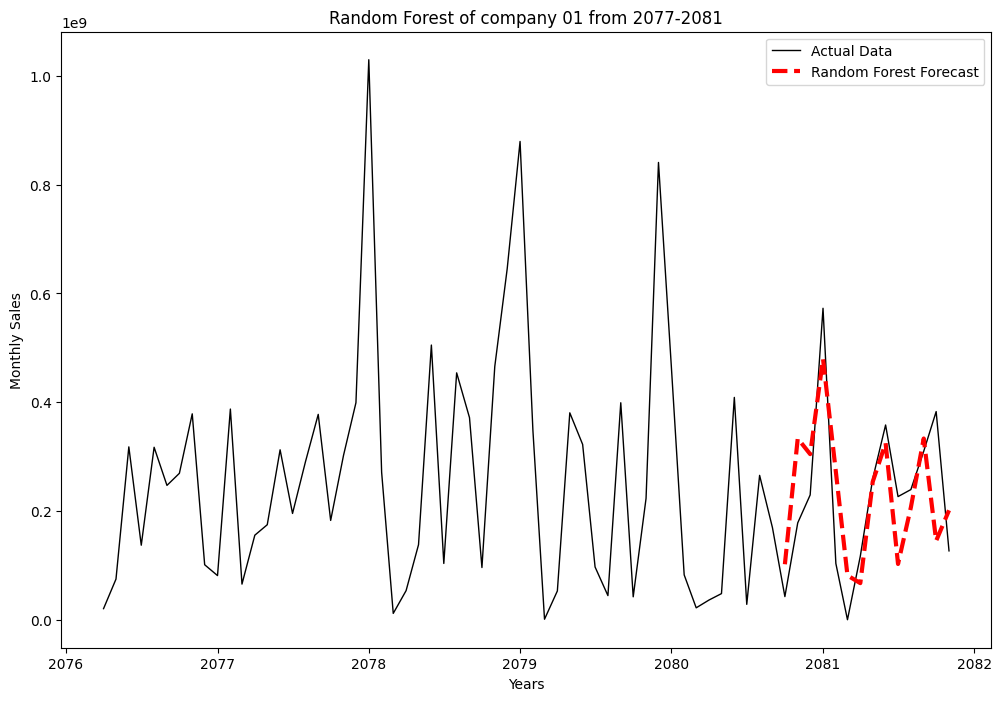

In [111]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df['sales'], label="Actual Data", color="black", linewidth=1)
plt.plot(test.index, yran_pred, label="Random Forest Forecast", color="red", linestyle="dashed", linewidth=3)
plt.title("Random Forest of company 01 from 2077-2081")
plt.xlabel("Years")
plt.ylabel("Monthly Sales")
plt.legend()
plt.show()

### XG boost

In [112]:

# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=6,
                             subsample=0.8, colsample_bytree=0.8, random_state=42, eval_metric="rmse")
xgb_model.fit(X_train_scaled, y_train_scaled, eval_set=[(X_test_scaled, y_test_scaled)], verbose=True)
yxg_pred_scaled = xgb_model.predict(X_test_scaled)
yxg_pred = scaler_y.inverse_transform(yxg_pred_scaled.reshape(-1, 1)).flatten()


[0]	validation_0-rmse:0.66839
[1]	validation_0-rmse:0.66057
[2]	validation_0-rmse:0.63719
[3]	validation_0-rmse:0.62424
[4]	validation_0-rmse:0.62055
[5]	validation_0-rmse:0.61345
[6]	validation_0-rmse:0.60977
[7]	validation_0-rmse:0.60291
[8]	validation_0-rmse:0.59906
[9]	validation_0-rmse:0.60009
[10]	validation_0-rmse:0.59188
[11]	validation_0-rmse:0.58594
[12]	validation_0-rmse:0.58161
[13]	validation_0-rmse:0.57783
[14]	validation_0-rmse:0.57117
[15]	validation_0-rmse:0.57084
[16]	validation_0-rmse:0.56479
[17]	validation_0-rmse:0.56774
[18]	validation_0-rmse:0.56602
[19]	validation_0-rmse:0.55789
[20]	validation_0-rmse:0.55502
[21]	validation_0-rmse:0.55372
[22]	validation_0-rmse:0.55405
[23]	validation_0-rmse:0.54516
[24]	validation_0-rmse:0.53855
[25]	validation_0-rmse:0.54313
[26]	validation_0-rmse:0.54204
[27]	validation_0-rmse:0.54268
[28]	validation_0-rmse:0.53731
[29]	validation_0-rmse:0.53363
[30]	validation_0-rmse:0.53365
[31]	validation_0-rmse:0.53451
[32]	validation_0-

[50]	validation_0-rmse:0.51987
[51]	validation_0-rmse:0.51914
[52]	validation_0-rmse:0.52055
[53]	validation_0-rmse:0.51882
[54]	validation_0-rmse:0.51839
[55]	validation_0-rmse:0.51946
[56]	validation_0-rmse:0.51944
[57]	validation_0-rmse:0.51848
[58]	validation_0-rmse:0.51819
[59]	validation_0-rmse:0.51753
[60]	validation_0-rmse:0.51489
[61]	validation_0-rmse:0.51593
[62]	validation_0-rmse:0.51400
[63]	validation_0-rmse:0.51124
[64]	validation_0-rmse:0.51148
[65]	validation_0-rmse:0.51085
[66]	validation_0-rmse:0.51269
[67]	validation_0-rmse:0.51318
[68]	validation_0-rmse:0.51175
[69]	validation_0-rmse:0.51140
[70]	validation_0-rmse:0.51093
[71]	validation_0-rmse:0.51100
[72]	validation_0-rmse:0.51157
[73]	validation_0-rmse:0.50892
[74]	validation_0-rmse:0.51002
[75]	validation_0-rmse:0.50904
[76]	validation_0-rmse:0.51041
[77]	validation_0-rmse:0.51012
[78]	validation_0-rmse:0.51019
[79]	validation_0-rmse:0.50871
[80]	validation_0-rmse:0.50880
[81]	validation_0-rmse:0.50894
[82]	val

In [113]:
# XGBoost Metrics
mae_xgb = mean_absolute_error(y_test, yxg_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, yxg_pred))
print(f"XGBoost MAE 2077-2081: {mae_xgb:.2f}")
print(f"XGBoost RMSE 2077-2081: {rmse_xgb:.2f}")


XGBoost MAE 2077-2081: 89519934.83
XGBoost RMSE 2077-2081: 113117043.91


In [114]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, yxg_pred)
print(f"XG boost R² Score 2077-2081: {r2_rf:.4f}")

XG boost R² Score 2077-2081: 0.3912


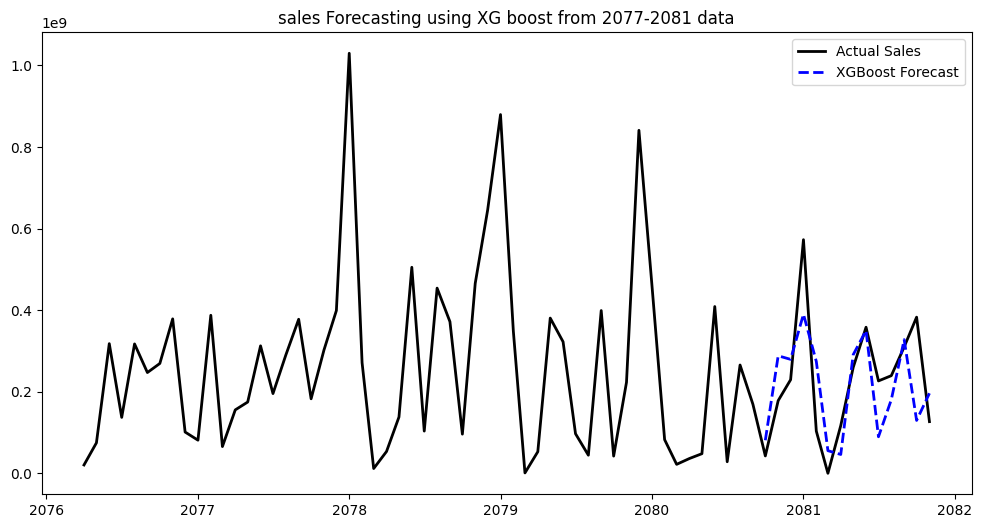

In [115]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["sales"], label="Actual Sales", color="black", linewidth=2)

plt.plot(X_test.index, yxg_pred, label="XGBoost Forecast", color="blue", linestyle="dashed", linewidth=2)
plt.title("sales Forecasting using XG boost from 2077-2081 data")
plt.legend()
plt.show()



### Comparision from Random Forest and XG boost from 2074-2081 data and Visualizing them

Random Forest                           XG Boost
1. MAE random: 86684694.75   ----------------             1. MAE xgb: 89519934.83
2. RMSE random: 106753684.67 ----------------            2. RMSE xgb: 113117043.91
3. R2 score random: 0.4578-----------------             3. R2_score xgb: 0.3912

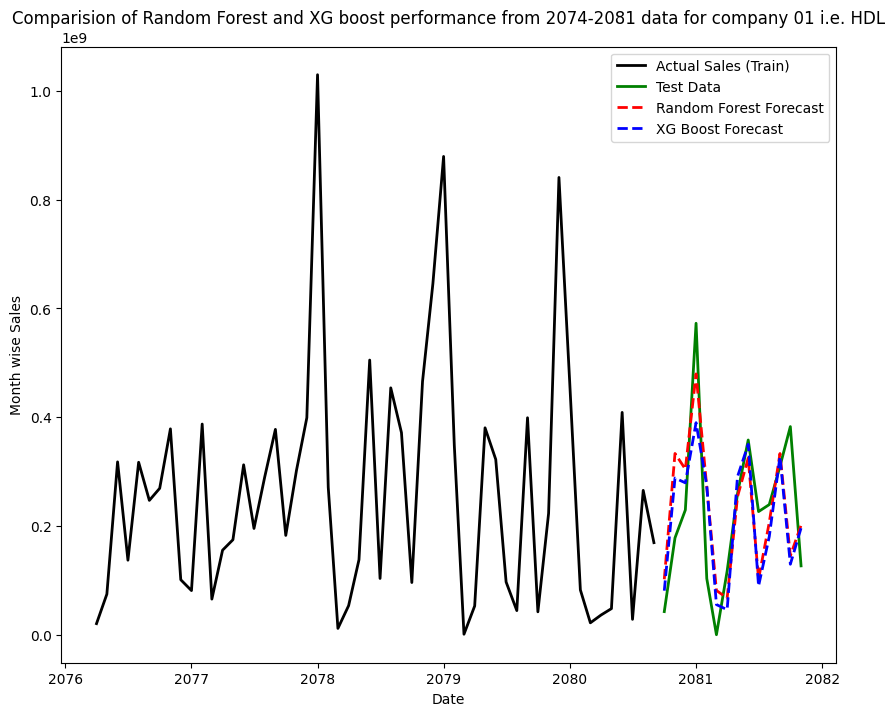

In [116]:
plt.figure(figsize=(10,8))
plt.plot(df.index[:-(len(X_test))], df["sales"][:-(len(X_test))], label="Actual Sales (Train)", color="black", linestyle="solid", linewidth=2)
plt.plot(df.index[-(len(X_test)):], df["sales"][-(len(X_test)):], label="Test Data", color="green", linestyle="solid", linewidth=2)
plt.plot(X_test.index, yran_pred, label="Random Forest Forecast", color="red", linestyle="dashed", linewidth=2 )
plt.plot(X_test.index, yxg_pred, label="XG Boost Forecast", color="blue", linestyle="dashed", linewidth=2)
plt.title("Comparision of Random Forest and XG boost performance from 2074-2081 data for company 01 i.e. HDL")
plt.xlabel("Date")
plt.ylabel("Month wise Sales")
plt.legend()
plt.show()